# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Assignment 1 - Regression

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Feb 10, 2022
#### Modified: Feb 10, 2022

In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python

In [2]:
# load data from Q1
%store -r df F T F_train F_test T_train T_test

Text(33.0, 0.5, 'Features')

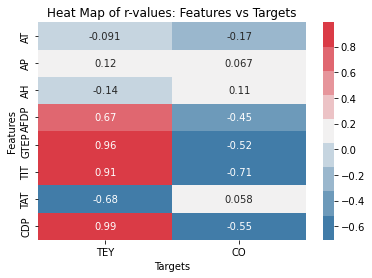

In [8]:
# Heat map for r-values of features vs targets
r = df.corr().iloc[:8, 8:10]

# plt.figure(figsize=(25,10))
sns.heatmap(r,annot=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.title('Heat Map of r-values: Features vs Targets')
plt.xlabel('Targets')
plt.ylabel('Features')

In [9]:
## Model building
from sklearn.linear_model import LinearRegression

# TEY - top four features: CDP, TIT, GTEP, (AFTP or TAT)? 
mlr_TEY = LinearRegression().fit(F_train[['TIT', 'CDP', 'GTEP', 'AFDP']], T_train['TEY'])

#CO - top four features 
mlr_CO = LinearRegression().fit(F_train[['TIT', 'CDP', 'GTEP', 'AFDP']], T_train['CO'])

In [13]:
## Model evalutation
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error as MSE

r2, RMSE, yp = [], [], []


for n in range(2):
    if n == 0:
        mlr = mlr_TEY
        target = 'TEY'
    else:
        mlr = mlr_CO
        target = 'CO'
    
    yp.append(mlr.predict(F_test[['TIT', 'CDP', 'GTEP', 'AFDP']]).astype('int64'))
    r2.append(r2_score(T_test[target], yp[n]))
    RMSE.append([('%s' %target), sqrt(MSE(T_test[target], yp[n]))])
    
    print('\nMLR Model (%s): r-squared = %f, RMSE = %f' %(target, r2[n], RMSE[n][1]))


MLR Model (TEY): r-squared = 0.980090, RMSE = 2.227878

MLR Model (CO): r-squared = 0.484101, RMSE = 1.622044


Text(0, 0.5, 'RMSE')

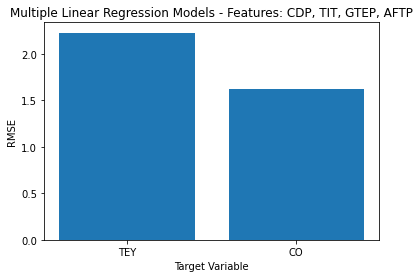

In [7]:
## Barchart of RMSE Values

RMSE_df = pd.DataFrame (RMSE, columns = ['Feature', 'RMSE'])  
plt.bar(RMSE_df.iloc[:,0],RMSE_df.iloc[:,1])
plt.title('Multiple Linear Regression Models - Features: CDP, TIT, GTEP, AFTP')
plt.xlabel('Target Variable')
plt.ylabel('RMSE')